In [1]:
%pylab inline
from simulation import *
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
import sys
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
import matplotlib.gridspec as gridspec


Populating the interactive namespace from numpy and matplotlib


In [2]:
#gamelogs = ["nbafinals/game1"]
gamelogs = ["nbafinals/game1","nbafinals/game2","nbafinals/game3","nbafinals/game4","nbafinals/game5"]
gamelogs += ["nbafinals/cavspacers1","nbafinals/cavspacers2","nbafinals/cavspacers3","nbafinals/cavspacers4"]
gamelogs += ["nbafinals/cavsraptors1","nbafinals/cavsraptors2","nbafinals/cavsraptors3","nbafinals/cavsraptors4"]
gamelogs += ["nbafinals/cavsceltics1","nbafinals/cavsceltics2","nbafinals/cavsceltics3","nbafinals/cavsceltics4","nbafinals/cavsceltics5"]

In [3]:
Lebron_FT  = ["".join(["+" if "makes" in line else "-" for line in open(game) if '\tLeBron' in line and "free throw" in line]) for game in gamelogs]
Lebron_3  = ["".join(["+" if "makes" in line else "-" for line in open(game) if '\tLeBron' in line and "three" in line]) for game in gamelogs]
Kyrie_FT = ["".join(["+" if "makes" in line else "-" for line in open(game) if '\tKyrie Irving' in line and "free throw" in line]) for game in gamelogs]
Kyrie_3  = ["".join(["+" if "makes" in line else "-" for line in open(game) if '\tKyrie Irving' in line and "three" in line]) for game in gamelogs]
#Durant_FT  = ["".join(["+" if "makes" in line else "-" for line in open(game) if '\tKevin Durant' in line and "free throw" in line]) for game in gamelogs]
#Durant_3  = ["".join(["+" if "makes" in line else "-" for line in open(game) if '\tKevin Durant' in line and "three" in line]) for game in gamelogs]

JR_3 = ["".join(["+" if "makes" in line else "-" for line in open(game) if '\tJR' in line and "three" in line]) for game in gamelogs]
#Klay_3 = ["".join(["+" if "makes" in line else "-" for line in open(game) if '\tKlay' in line and "three" in line]) for game in gamelogs]

In [18]:
bron_models = evaluate_models(Lebron_3,["+","-"],alpha=1e-3,qbounds = [0,4])

In [23]:
bron_1 = infer_model(Lebron_3,["+","-"],1e-3,1)
bron_2 = infer_model(Lebron_3,["+","-"],1e-3,2)
bron_3 = infer_model(Lebron_3,["+","-"],1e-3,3)
bron_4 = infer_model(Lebron_3,["+","-"],1e-3,4)

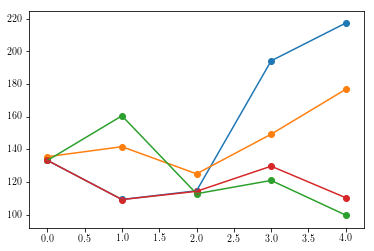

In [34]:
plt.plot([v for v in bron_models['LOO'].values()])
plt.scatter([0,1,2,3,4],[v for v in bron_models['LOO'].values()])
plt.plot([v for v in bron_models['AIC'].values()])
plt.scatter([0,1,2,3,4],[v for v in bron_models['AIC'].values()])
plt.plot([v for v in bron_models['WAIC1'].values()])
plt.scatter([0,1,2,3,4],[v for v in bron_models['WAIC1'].values()])
plt.plot([v for v in bron_models['WAIC2'].values()])
plt.scatter([0,1,2,3,4],[v for v in bron_models['WAIC2'].values()])

#plt.axes.set_xticks([0,1,2,3,4])

In [25]:
Lebron_3

['-+-+--',
 '+--',
 '+++--+',
 '-+-+-+--',
 '++----',
 '++-',
 '--',
 '+-+-+-++--+-',
 '-+-',
 '--++-',
 '++-++-',
 '++',
 '+-+-++--+-',
 '--+-',
 '-+++-',
 '----',
 '----+-',
 '--+++']

In [26]:
bron_2

(defaultdict(functools.partial(<built-in function zeros>, 2),
             {'++': array([ 0.25004166,  0.74995834]),
              '+-': array([ 0.56249219,  0.43750781]),
              '-+': array([ 0.31580886,  0.68419114]),
              '--': array([ 0.53845562,  0.46154438]),
              '0+': array([ 0.62496876,  0.37503124]),
              '0-': array([ 0.40002,  0.59998])}),
 defaultdict(functools.partial(<built-in function zeros>, 2),
             {'++': array([ 3.,  9.]),
              '+-': array([ 9.,  7.]),
              '-+': array([  6.,  13.]),
              '--': array([ 7.,  6.]),
              '0+': array([ 5.,  3.]),
              '0-': array([ 4.,  6.])}))

In [27]:
bron_4

(defaultdict(functools.partial(<built-in function zeros>, 2),
             {'+++-': array([  9.98003992e-04,   9.99001996e-01]),
              '++-+': array([  9.99001996e-01,   9.98003992e-04]),
              '++--': array([ 0.74987506,  0.25012494]),
              '+-++': array([  3.33111259e-04,   9.99666889e-01]),
              '+-+-': array([ 0.66661113,  0.33338887]),
              '+--+': array([  4.99500500e-04,   9.99500500e-01]),
              '+---': array([  9.98003992e-04,   9.99001996e-01]),
              '-+++': array([  9.98003992e-04,   9.99001996e-01]),
              '-++-': array([  4.99500500e-04,   9.99500500e-01]),
              '-+-+': array([ 0.33338887,  0.66661113]),
              '--++': array([ 0.5,  0.5]),
              '---+': array([  9.98003992e-04,   9.99001996e-01]),
              '----': array([  9.99001996e-01,   9.98003992e-04]),
              '0+++': array([  9.98003992e-04,   9.99001996e-01]),
              '0++-': array([ 0.5,  0.5]),
           